SOAL: Pada dataset berikut, buat dengan langkah yang sama untuk mencari korelasi antara variabel dependen (Income) dan variabel independen pada dataset di bawah. Buat kesimpulan dari hasil perbandingan antara "Income" dengan "Education" dan "Income" dengan "Age" (perlu buat kolom baru untuk ini).

Link dataset: https://drive.google.com/file/d/1UCICelAvJd870wuyYWLFWUJYpino88xK/view?usp=sharing




In [ ]:
#Import libraries
import pandas as pd # This line imports the pandas library and assigns it to the alias 'pd'
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns

# menghilangkan warningsimport warnings
import warnings
warnings.filterwarnings('ignore')

# load data smartpath ke sebuah dataframe bernama df
df = pd.read_csv('/content/survey_data_smartpath.csv')

# Eksplorasi Data Awal


## Data smartpath

In [ ]:
# cek dimensi dataframe(df)
df.shape

(3046, 8)

In [ ]:
# cek detail informasi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3046 non-null   int64  
 1   Gender          3046 non-null   object 
 2   Year_Birth      3046 non-null   int64  
 3   Education       3046 non-null   object 
 4   Income          3046 non-null   int64  
 5   Total_Spend     3046 non-null   int64  
 6   Sales           3046 non-null   int64  
 7   Online_Traffic  3046 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 190.5+ KB


In [ ]:
#cek detail informasi df
df.head(10)

,ID,Gender,Year_Birth,Education,Income,Total_Spend,Sales,Online_Traffic
0,1,Female,1975,Sarjana,3000000,2221271,8,5.12
1,2,Male,1998,Diploma IV,2156000,273867,19,17.52
2,3,Male,1981,SMA,2256000,1906013,18,12.58
3,4,Female,1992,SMK,2158000,1458959,19,14.79
4,5,Female,1999,Diploma IV,2128000,1271694,11,8.56
5,6,Male,1999,SMA,1824000,1351090,13,7.76
6,7,Female,1994,SMA,1944000,470424,24,23.03
7,8,Male,2004,SMA,1704000,942340,10,13.29
8,9,Female,2002,SMA,1752000,421368,23,13.10
9,10,Female,1999,SMA,1824000,1443744,28,20.52


In [ ]:
#lihat isi Education
df.groupby(['Education', 'Gender']).size()

Education      Gender
Diploma IV     Female    191
               Male      121
Doktoral       Female     19
               Male        9
Master         Female    123
               Male       77
PhD            Female     46
               Male       20
SMA            Female    455
               Male      294
SMK            Female    357
               Male      255
SMP sederajat  Female    291
               Male      173
Sarjana        Female    361
               Male      254
dtype: int64

# Preprocessing Data

## Cek Missing Values

### Data Smartpath

In [ ]:
# cek apakah ada baris yg kosong
df.isna().sum()

,0
ID,0
Gender,0
Year_Birth,0
Education,0
Income,0
Total_Spend,0
Sales,0
Online_Traffic,0


## Data duplicates

### Data Smartpath

In [ ]:
# cek banyak baris yang terduplikasi
df.duplicated().sum()

22

In [ ]:
# Hapus baris yang terduplikasi
df_drop = df.drop_duplicates().reset_index(drop = True)

In [ ]:
# Info df setelah di drop
shape_info = df_drop.shape
print(shape_info)  # Output: (rows, columns)

(3024, 8)


In [ ]:
# Simpan DataFrame ke file CSV
output_file = 'df_drop.csv'
df_drop.to_csv(output_file, index=False)

# Unduh file
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data yg Typo

### Data Smartpath

In [ ]:
#info data df yang sudah di drop
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3024 non-null   int64  
 1   Gender          3024 non-null   object 
 2   Year_Birth      3024 non-null   int64  
 3   Education       3024 non-null   object 
 4   Income          3024 non-null   int64  
 5   Total_Spend     3024 non-null   int64  
 6   Sales           3024 non-null   int64  
 7   Online_Traffic  3024 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 189.1+ KB


In [ ]:
# cek data yang typo di setiap kolom
typodf_drop= df_drop.select_dtypes(include=['object']).columns
for col in typodf_drop:
  print(col)
  print(pd.DataFrame(df_drop[col].unique()))

Gender
        0
0  Female
1    Male
Education
               0
0        Sarjana
1     Diploma IV
2            SMA
3            SMK
4         Master
5       Doktoral
6  SMP sederajat
7            PhD


In [ ]:
df['Total_Spend'].unique()

array([2221271,  273867, 1906013, ..., 1556068, 1798325,  757533])

## Menangani missing value
di data smartpath (df) gaada missing value

## cek outliers

### data smartpath

In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3024 non-null   int64  
 1   Gender          3024 non-null   object 
 2   Year_Birth      3024 non-null   int64  
 3   Education       3024 non-null   object 
 4   Income          3024 non-null   int64  
 5   Total_Spend     3024 non-null   int64  
 6   Sales           3024 non-null   int64  
 7   Online_Traffic  3024 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 189.1+ KB


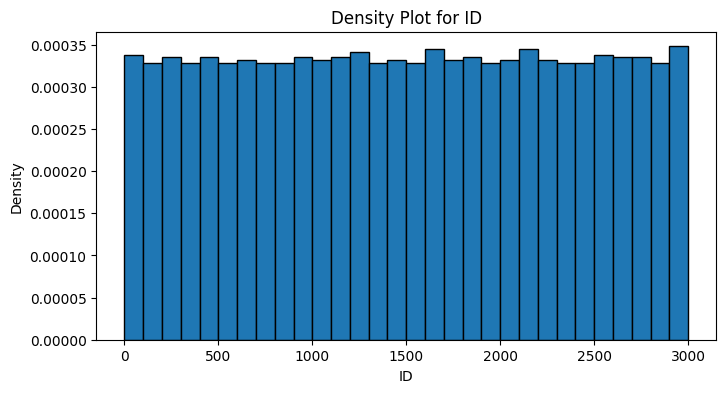

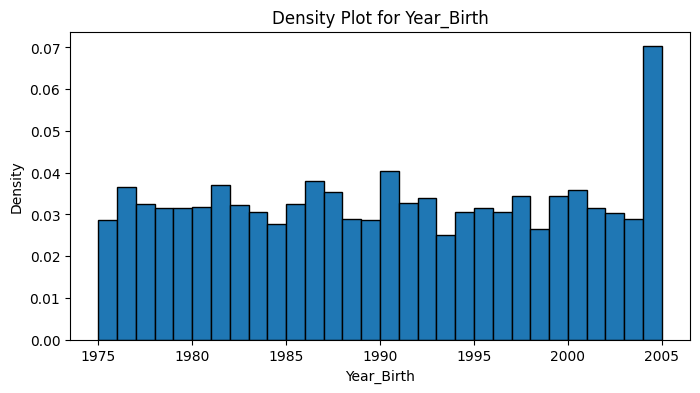

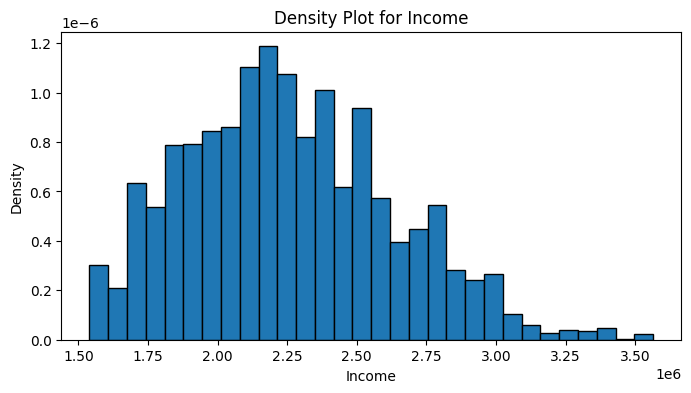

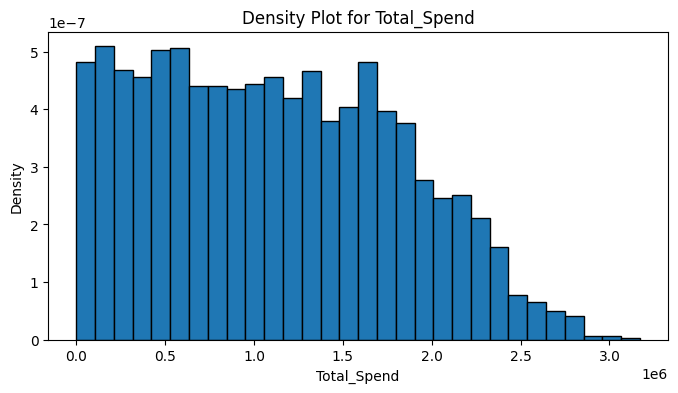

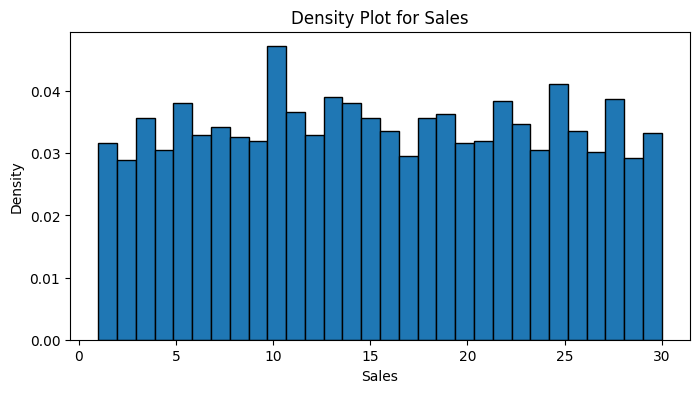

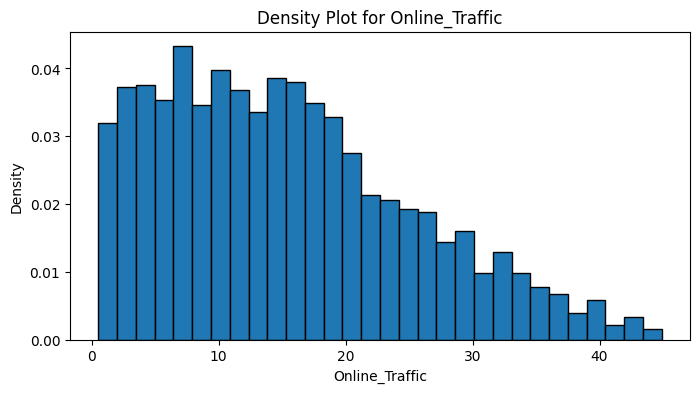

In [ ]:
# cek outliers pada kolom data numeric menggunakan visualisasi density plot
# Assuming you have your DataFrame in a variable called 'df'
kolom_numeric = ['ID', 'Year_Birth', 'Income', 'Total_Spend', 'Sales', 'Online_Traffic']

for col in kolom_numeric:
    plt.figure(figsize=(8, 4))
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.hist(df[col], bins=30, density=True, edgecolor='black')
    plt.show()

In [ ]:
# membuat fungsi outlier
def cek_outlier(nama_kolom, batas) :
  Q1 = np.percentile(df_drop[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(df_drop[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR =  Q3 - Q1

  if batas == 'upper_bound' :
    bound = np.where(df_drop[nama_kolom] >= (Q3 + 1.5 * IQR))
  elif batas == 'lower_bound' :
    bound = np.where(df_drop[nama_kolom] <= (Q1 - 1.5 * IQR))
  return list(bound[0])

In [ ]:
# jumlah outlier pada kolom yang bentuk datanya float64 yaitu Online_Traffic
upper_ontraf = cek_outlier('Online_Traffic','upper_bound')
lower_ontraf = cek_outlier('Online_Traffic','lower_bound')
print(f"Jumlah total outlier pada kolom Online Traffic : {len(upper_ontraf) + len(lower_ontraf)}")

Jumlah total outlier pada kolom Online Traffic : 8


## Menangani Outliers (IQR)

### Data Smartpath

In [ ]:
# Buat fungsi untuk filtering outliers
def filter_outlier(df_drop, nama_kolom):
    if nama_kolom == 'Online_Traffic':
        data_temp = df_drop.loc[~df_drop.index.isin(upper_ontraf)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_ontraf)]
        return data_temp

In [ ]:
# membersihkan outlier untuk kolom Online Traffic
df_drop_clean = filter_outlier(df_drop, 'Online_Traffic')
df_drop_clean.reset_index(drop=True, inplace=True)
df_drop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3016 non-null   int64  
 1   Gender          3016 non-null   object 
 2   Year_Birth      3016 non-null   int64  
 3   Education       3016 non-null   object 
 4   Income          3016 non-null   int64  
 5   Total_Spend     3016 non-null   int64  
 6   Sales           3016 non-null   int64  
 7   Online_Traffic  3016 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 188.6+ KB


In [ ]:
# cek 5 baris pada df_drop_clean
df_drop_clean.head()

,ID,Gender,Year_Birth,Education,Income,Total_Spend,Sales,Online_Traffic
0,1,Female,1975,Sarjana,3000000,2221271,8,5.12
1,2,Male,1998,Diploma IV,2156000,273867,19,17.52
2,3,Male,1981,SMA,2256000,1906013,18,12.58
3,4,Female,1992,SMK,2158000,1458959,19,14.79
4,5,Female,1999,Diploma IV,2128000,1271694,11,8.56


In [ ]:
df_drop.shape

(3024, 8)

In [ ]:
df_drop_clean.shape

(3016, 8)

In [ ]:
print(df_drop_clean.head())

   ID  Gender  Year_Birth   Education   Income  Total_Spend  Sales  \
0   1  Female        1975     Sarjana  3000000      2221271      8   
1   2    Male        1998  Diploma IV  2156000       273867     19   
2   3    Male        1981         SMA  2256000      1906013     18   
3   4  Female        1992         SMK  2158000      1458959     19   
4   5  Female        1999  Diploma IV  2128000      1271694     11   

   Online_Traffic  
0            5.12  
1           17.52  
2           12.58  
3           14.79  
4            8.56  


# Label Encoding

### Data Smartparth

In [ ]:
df_drop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3016 non-null   int64  
 1   Gender          3016 non-null   object 
 2   Year_Birth      3016 non-null   int64  
 3   Education       3016 non-null   object 
 4   Income          3016 non-null   int64  
 5   Total_Spend     3016 non-null   int64  
 6   Sales           3016 non-null   int64  
 7   Online_Traffic  3016 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 188.6+ KB


buat mapping khusus data yang berbentuk *object* untuk kolom "Education"
- 0        Sarjana
- 1     Diploma IV
- 2            SMA
- 3            SMK
- 4         Master
- 5       Doktoral
- 6  SMP sederajat
- 7            PhD

In [ ]:
print(df_drop_clean.head())

   ID  Year_Birth   Income  Total_Spend  Sales  Online_Traffic
0   1        1975  3000000      2221271      8            5.12
1   2        1998  2156000       273867     19           17.52
2   3        1981  2256000      1906013     18           12.58
3   4        1992  2158000      1458959     19           14.79
4   5        1999  2128000      1271694     11            8.56


In [ ]:
# mapping "Education" kategori baru
education_mapping = {
    'Sarjana' : 0,
    'Diploma IV' : 1,
    'SMA' : 2,
    'SMK' : 3,
    'Master' : 4,
    'Doktoral' : 5,
    'SMP Sederajat' : 6,
    'PhD' : 7
}

# mengubah kolom Education sesuai dengan mapping yang telah dilakukan
df_drop_clean['Education'] = df_drop_clean['Education'] \
                            .map(education_mapping) \
                            .astype('category') \
                            .cat \
                            .codes

In [ ]:
cat_columns = ['Education','Gender']
for col in cat_columns:
    df_drop_clean[col] = df_drop_clean[col].astype('category').cat.codes

df_drop_clean.head()

,ID,Gender,Year_Birth,Education,Income,Total_Spend,Sales,Online_Traffic
0,1,0,1975,1,3000000,2221271,8,5.12
1,2,1,1998,2,2156000,273867,19,17.52
2,3,1,1981,3,2256000,1906013,18,12.58
3,4,0,1992,4,2158000,1458959,19,14.79
4,5,0,1999,2,2128000,1271694,11,8.56


In [ ]:
df.head()

,ID,Gender,Year_Birth,Education,Income,Total_Spend,Sales,Online_Traffic
0,1,Female,1975,Sarjana,3000000,2221271,8,5.12
1,2,Male,1998,Diploma IV,2156000,273867,19,17.52
2,3,Male,1981,SMA,2256000,1906013,18,12.58
3,4,Female,1992,SMK,2158000,1458959,19,14.79
4,5,Female,1999,Diploma IV,2128000,1271694,11,8.56


kolom-kolom yang yang di lakukan korelasi adalah Kolom yang bentuk datanya int/float

In [ ]:
df_drop_clean = df_drop_clean.drop(columns=['Gender','Education'])

In [ ]:
df_drop_clean.head()

,ID,Year_Birth,Income,Total_Spend,Sales,Online_Traffic
0,1,1975,3000000,2221271,8,5.12
1,2,1998,2156000,273867,19,17.52
2,3,1981,2256000,1906013,18,12.58
3,4,1992,2158000,1458959,19,14.79
4,5,1999,2128000,1271694,11,8.56


### Cek distribusi data

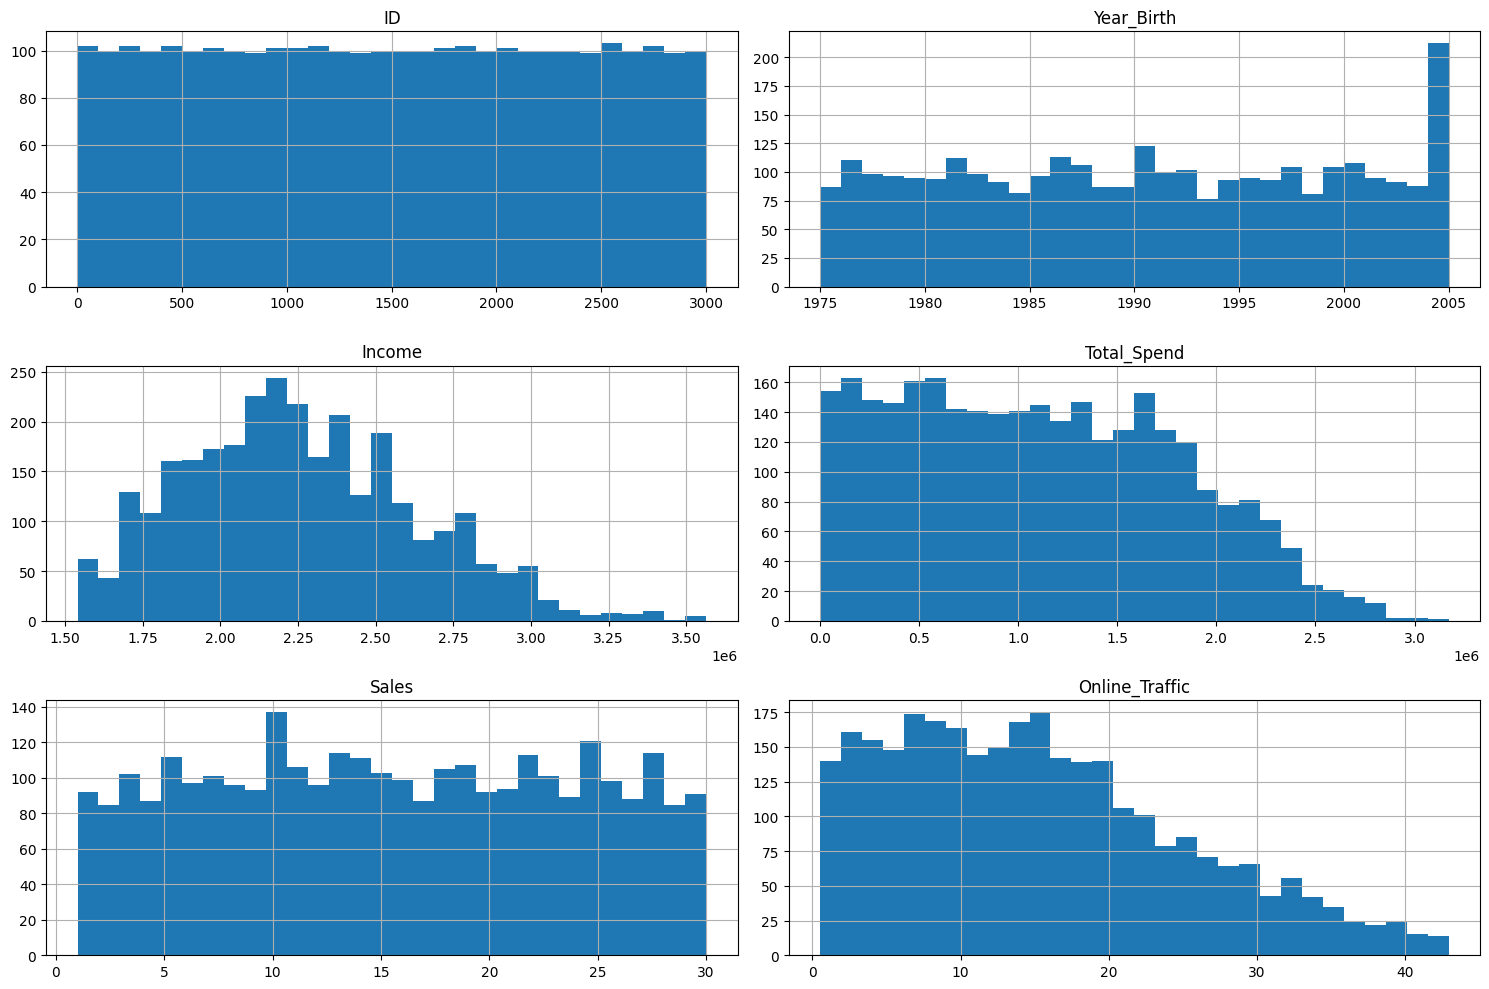

In [ ]:
# visualisasi histogram untuk semua kolom numeric
df_drop_clean.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import kstest

for col in df_drop_clean.select_dtypes(include='number').columns:
    stat, p = kstest(df_drop_clean[col].dropna(), 'norm', args=(df_drop_clean[col].mean(), df_drop_clean[col].std()))
    print(f"{col}: Statistik={stat:.3f}, p-value={p:.3f}")
    if p > 0.05:
        print(f"{col} terdistribusi normal.\n")
    else:
        print(f"{col} tidak terdistribusi normal.\n")

ID: Statistik=0.058, p-value=0.000
ID tidak terdistribusi normal.

Year_Birth: Statistik=0.076, p-value=0.000
Year_Birth tidak terdistribusi normal.

Income: Statistik=0.044, p-value=0.000
Income tidak terdistribusi normal.

Total_Spend: Statistik=0.065, p-value=0.000
Total_Spend tidak terdistribusi normal.

Sales: Statistik=0.076, p-value=0.000
Sales tidak terdistribusi normal.

Online_Traffic: Statistik=0.065, p-value=0.000
Online_Traffic tidak terdistribusi normal.



### korelasi antara variabel dependen (Income) dan variabel independen

Pearson Correlation

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_drop_clean.corr()
# Korelasi variabel Income dengan variabel lainnya
correlation_with_Income = correlation_matrix['Income'].sort_values(ascending=False)

# Tampilkan hasilnya
print(correlation_with_Income)

Income            1.000000
Total_Spend       0.270011
ID                0.033914
Sales            -0.011381
Online_Traffic   -0.018221
Year_Birth       -0.629368
Name: Income, dtype: float64


Spearman Correlation

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_drop_clean.corr(method='spearman')
# Korelasi variabel Income dengan variabel lainnya
correlation_with_Income = correlation_matrix['Income'].sort_values(ascending=False)

# Tampilkan hasilnya
print(correlation_with_Income)

Income            1.000000
Total_Spend       0.240815
ID                0.033924
Sales            -0.006453
Online_Traffic   -0.007211
Year_Birth       -0.629910
Name: Income, dtype: float64


Perbedaan Pearson dan Spearman

* Pearson:
1. Mengukur hubungan linier antara dua variabel.
2. Sensitif terhadap outlier.

* Spearman:
1. Mengukur hubungan monoton (tidak harus linier).
2. Lebih tahan terhadap outlier dan cocok untuk data ordinal.

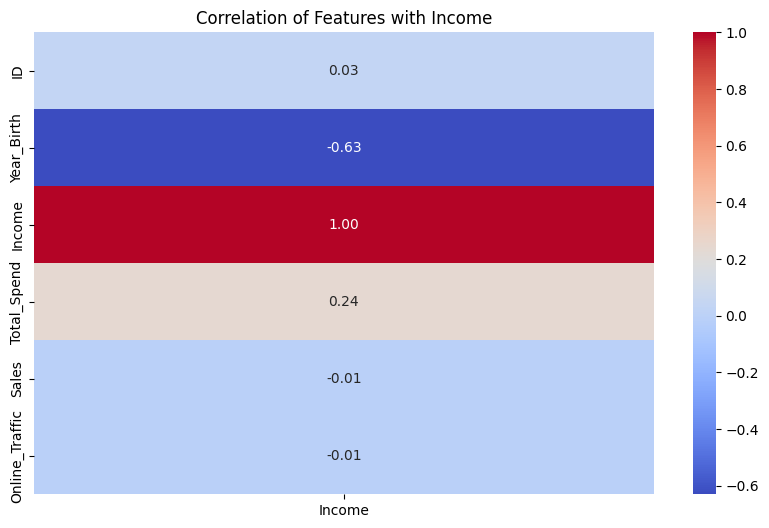

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Income']], annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation of Features with Income')
plt.show()

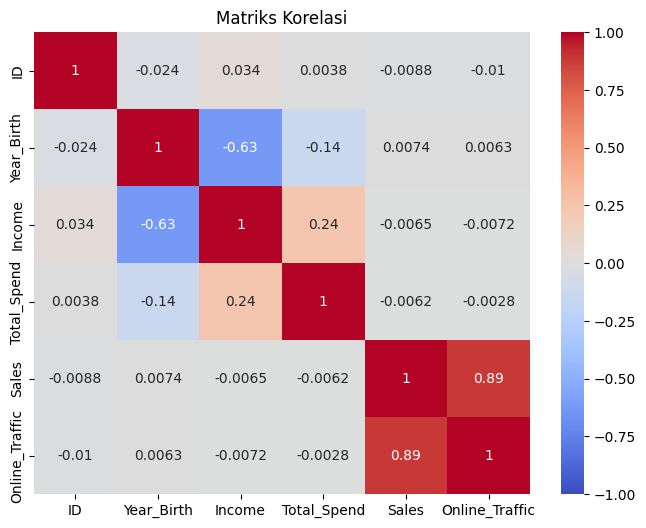

In [ ]:
# Membuat plot matriks korelasi untuk semua variabel (opsional)
df_drop_clean.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Menambahkan judul
plt.title('Matriks Korelasi')

# Menampilkan plot
plt.show()

## Kesimpulan dari hasil perbandingan antara "Income" dengan "Education" dan "Income" dengan "Age"

Rata-rata pendapatan berdasarkan tingkat pendidikan:
Education
Doktoral         3.120428e+06
PhD              2.885364e+06
Master           2.692571e+06
Sarjana          2.550445e+06
Diploma IV       2.372347e+06
SMK              2.214918e+06
SMA              2.044258e+06
SMP sederajat    1.870948e+06
Name: Income, dtype: float64

Rata-rata pendapatan berdasarkan usia:
Age
49    2.650703e+06
48    2.595515e+06
50    2.556322e+06
46    2.548547e+06
47    2.534125e+06
42    2.511296e+06
45    2.500000e+06
44    2.494357e+06
43    2.488224e+06
40    2.443918e+06
39    2.368649e+06
41    2.361560e+06
38    2.348860e+06
37    2.341091e+06
36    2.263678e+06
35    2.245935e+06
33    2.237745e+06
34    2.223030e+06
32    2.209684e+06
30    2.131667e+06
31    2.128645e+06
29    2.086280e+06
27    2.062840e+06
28    2.034000e+06
25    2.033333e+06
26    2.000846e+06
24    1.975410e+06
23    1.952549e+06
22    1.929273e+06
21    1.870483e+06
20    1.837500e+06
Name: Income, dtype: float64

Korel

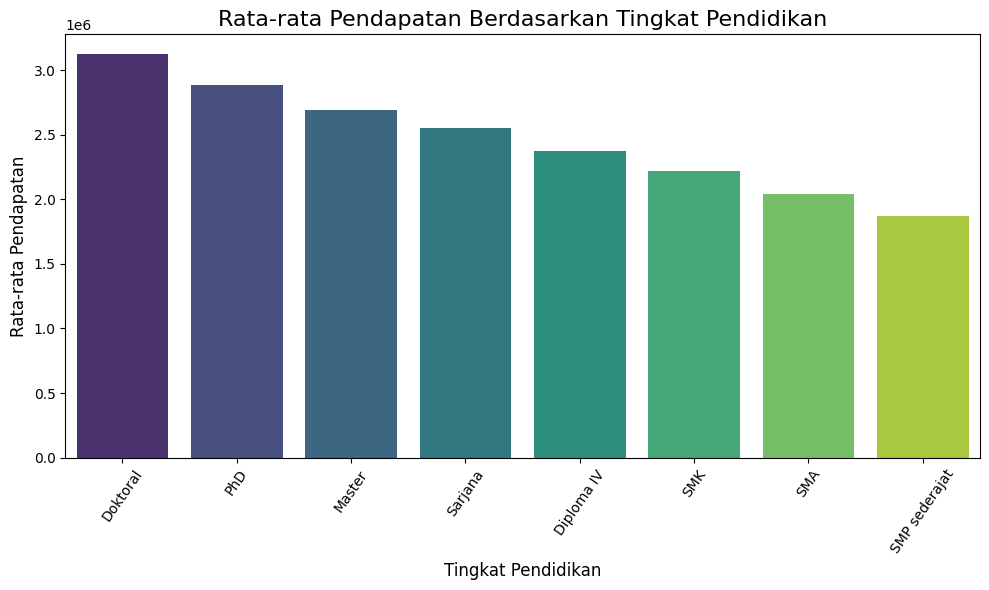

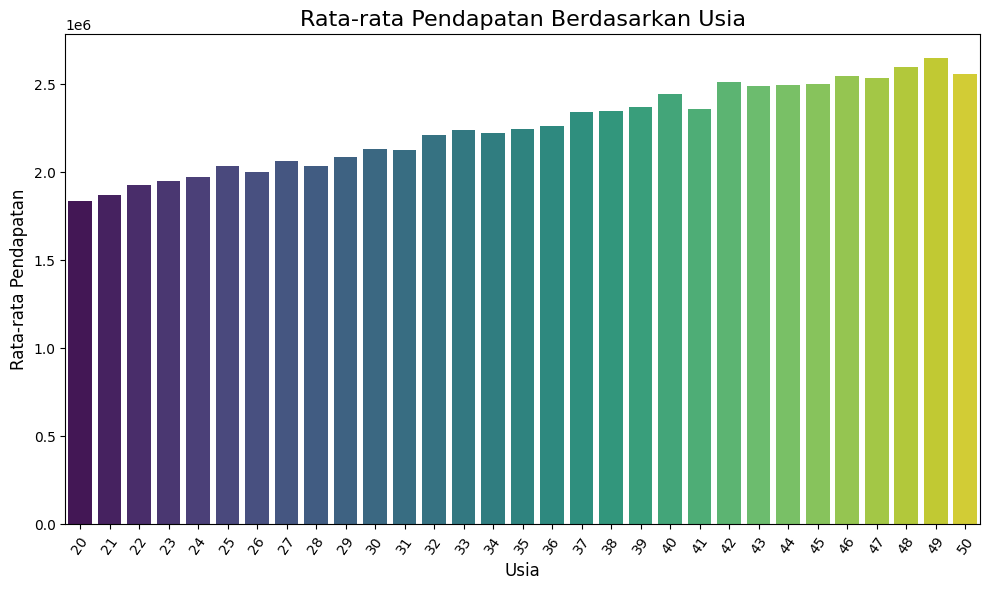

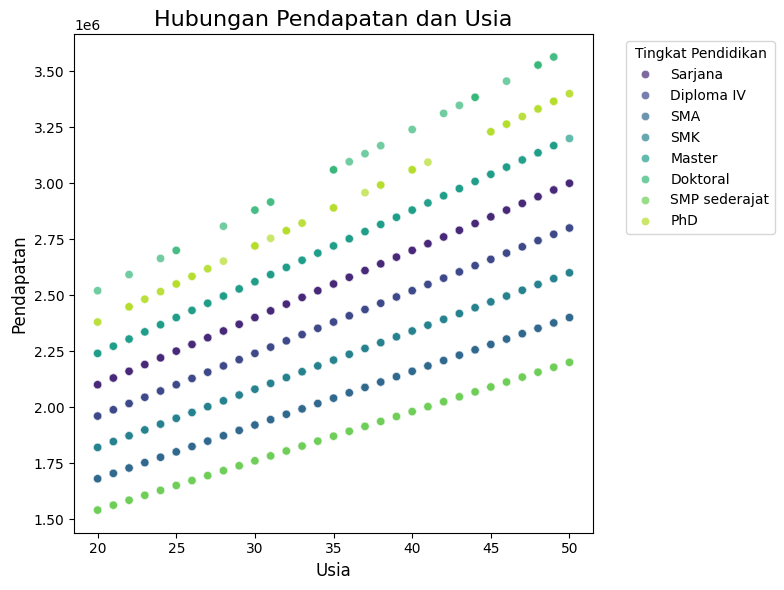

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/df_drop.csv'
data = pd.read_csv(file_path)

# Tambahkan kolom Age
current_year = 2025
data['Age'] = current_year - data['Year_Birth']

# Perbandingan Income dengan Education
income_by_education = data.groupby('Education')['Income'].mean().sort_values(ascending=False)

# Perbandingan Income dengan Age
income_by_age = data.groupby('Age')['Income'].mean().sort_values(ascending=False)
# Korelasi antara Income dengan Age
correlation_income_age = data[['Income', 'Age']].corr().loc['Income', 'Age']

# Cetak hasil analisis
print("Rata-rata pendapatan berdasarkan tingkat pendidikan:", end="\n")
print(income_by_education)
print()
print("Rata-rata pendapatan berdasarkan usia:", end="\n")
print(income_by_age)
print()
print(f"Korelasi antara pendapatan dan usia: {correlation_income_age:.2f}", end="\n")
print()
print()

# Visualisasi hubungan Income dan Education
plt.figure(figsize=(10, 6))
sns.barplot(x=income_by_education.index, y=income_by_education.values, palette="viridis")
plt.title("Rata-rata Pendapatan Berdasarkan Tingkat Pendidikan", fontsize=16)
plt.ylabel("Rata-rata Pendapatan", fontsize=12)
plt.xlabel("Tingkat Pendidikan", fontsize=12)
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

# Visualisasi hubungan Income dan Age
plt.figure(figsize=(10, 6))
sns.barplot(x=income_by_age.index, y=income_by_age.values, palette="viridis")
plt.title("Rata-rata Pendapatan Berdasarkan Usia", fontsize=16)
plt.ylabel("Rata-rata Pendapatan", fontsize=12)
plt.xlabel("Usia", fontsize=12)
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

# Visualisasi Korelasi Income dan Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Income', hue='Education', palette='viridis', alpha=0.7)
plt.title("Hubungan Pendapatan dan Usia", fontsize=16)
plt.ylabel("Pendapatan", fontsize=12)
plt.xlabel("Usia", fontsize=12)
plt.legend(title="Tingkat Pendidikan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Kesimpulan
Terdapat korelasi positif antara usia dan pendapatan yaitu pendapatan meningkat seiring bertambahnya usia.

Tingkat pendidikan berperan penting dalam menentukan pendapatan seseorang: semakin tinggi tingkat pendidikan, semakin besar pendapatan.